# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

It computes the weighted average of its inputs.

####  2. Why we use non-linear activation funcitons in neural networks?

If we dont use non-linear activation, no matter how many layers used in the networks, it's essentially just one layer, i.e. a linear transformation from input to output.

#### 3. What is the 'Logistic Loss' ?

loss of logistic regression: negative log likelihood of p(y|x)

$$ L = -(y * log(\hat{y}) + (1-y) * log(1-\hat{y})) $$

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

C

#### 5. Why we don't use zero initialization for all parameters ?

if all parameters are zero, the contribution of different input x cannot be distinguished.The feedfoward signals become zero everywhere and the network is symmetric and proper credit assignment / error backpropagation is not possible. 

#### 6. Can you implement the softmax function using python ? 

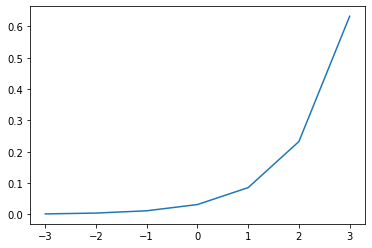

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def softmax(x):
    E = sum(np.exp(x))
    return [np.exp(xx)/E for xx in x]

x = np.arange(-3,4)
plt.plot(x,softmax(x))

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [3]:
# Loading the data 
digits = datasets.load_digits()

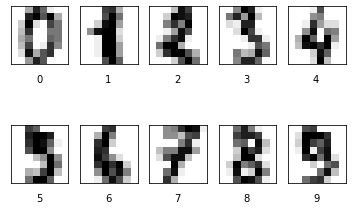

In [4]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [6]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [8]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1 / (1 + np.exp(-z))
    
    return s

In [9]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [10]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = 0.01 * np.random.rand(dim,1)
    b = 0.01 * np.random.rand()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

initialize_parameters(5)

(array([[0.00383189],
        [0.00673954],
        [0.00189942],
        [0.0006294 ],
        [0.00194302]]), 0.0014072125504056676)

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)}$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)}+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [11]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[1] 
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -np.mean(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    dw = 1/m * np.dot(X,(A-Y).T)
    db = 1/m * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost


X = np.random.rand(3,30)
Y = np.random.randint(2,size=(1,30))
w,b = initialize_parameters(3)
propagate(w,b,X,Y)

({'dw': array([[ 0.01520819],
         [-0.00259907],
         [-0.0063082 ]]), 'db': 0.003044071608628766}, 0.6932136100509927)

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w,b,X,Y)        
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs


w,b = initialize_parameters(64)
learning_rate = 1e-2
num_iterations = 1000
params,grads,costs = optimize(w, b, X_train.T, y_train.T, num_iterations, learning_rate, print_cost=True)

Cost after iteration 0: 0.966722
Cost after iteration 100: 0.434809
Cost after iteration 200: 0.328273
Cost after iteration 300: 0.331680
Cost after iteration 400: 0.312783
Cost after iteration 500: 0.300158
Cost after iteration 600: 0.295060
Cost after iteration 700: 0.292796
Cost after iteration 800: 0.291493
Cost after iteration 900: 0.290446


###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [13]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X) + b)
    
#     for i in range(A.shape[1]):
#         None 
    
    Y_prediction = (A > 0.5)
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [14]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost=False):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    
    dim = X_train.shape[0]
    
    w,b = initialize_parameters(dim)
    
    params, grads, cost = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)
    
    w,b = params["w"],params["b"]
    
    Y_train_hat = predict(w,b,X_train)
    Y_test_hat = predict(w,b,X_test)
    
    training_accuracy = np.mean(Y_train_hat == Y_train)
    test_accuracy = np.mean(Y_test_hat == Y_test)
    
    d = {"w":w,"b":b,"training_accuracy":training_accuracy,"test_accuracy":test_accuracy,"cost":cost}
    
    return d



num_iterations = 1000
learning_rate = 1e-2

d = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations, learning_rate,print_cost=True)

print("\n\nTraining Accuracy: {}".format(d["training_accuracy"],"%.2f"))
print("Test Accuracy: {}".format(d["test_accuracy"],"%.2f"))

Cost after iteration 0: 0.923365
Cost after iteration 100: 0.432814
Cost after iteration 200: 0.323810
Cost after iteration 300: 0.332458
Cost after iteration 400: 0.316512
Cost after iteration 500: 0.302282
Cost after iteration 600: 0.296355
Cost after iteration 700: 0.293762
Cost after iteration 800: 0.292267
Cost after iteration 900: 0.291028


Training Accuracy: 0.8841870824053452
Test Accuracy: 0.8911111111111111


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

Text(0, 0.5, 'Cost')

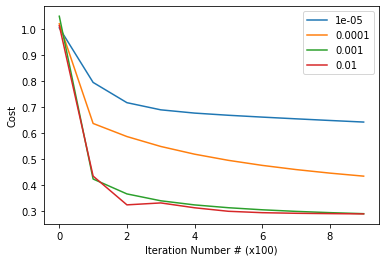

In [15]:
learning_rates = 10.0**np.arange(-5,-1)

for alpha in learning_rates:
    
    d = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations,alpha,print_cost=False)
    
    cost = d["cost"]

    plt.plot(cost,label=alpha)
    
plt.legend()
plt.xlabel('Iteration Number # (x100)')
plt.ylabel('Cost')

##### 4.2 Observe the effect of iteration_num on the test accuracy.

0.4974016332590943

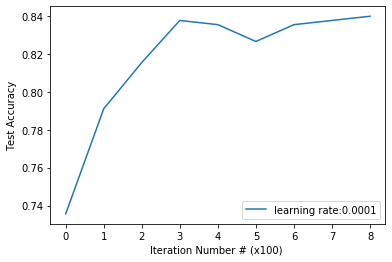

In [16]:
learning_rate = 0.0001
iter_num = np.arange(100,1000,100)

test_acc = []
for iter_n in iter_num:
    d = model(X_train.T, y_train.T, X_test.T, y_test.T,iter_n,learning_rate,print_cost=False)
    test_acc.append(d["test_accuracy"])
    
plt.plot(test_acc,label="learning rate:{}".format(learning_rate))
plt.legend()
plt.xlabel("Iteration Number # (x100) ")
plt.ylabel("Test Accuracy")
    
np.mean(y_train) # chance level

depending on learning rate, for small learning rate, the more number of iterations, the higher the test accuracy. But for large learning rate, the performance reaches plateau in a few iterations (though accuracy also goes up along with iterations before that), & then the accuracy starts to fluctuate around some level. 

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

# Congratulations ! You have completed assigment 4. 

In [17]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse=False)
Y = onehotencoder.fit_transform(digits.target.reshape(-1,1))

X_train, X_test, Y_train, Y_test = train_test_split(digits.data, Y, test_size=0.25)

print(Y_train[:5])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


C:\Users\neuro\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [18]:
def initialize_params(dim,dim_y):
    
    W = 0.01 * np.random.rand(dim,dim_y)
    b = 0.01 * np.random.rand(dim_y,1)
    
    return W,b

# activation function
def softmax(z):
    E = sum(np.exp(z))
    return [np.exp(zz)/E for zz in z]

# loss function
def cross_entropy(Y,Y_hat):
    return np.mean(-np.sum(Y * np.log(Y_hat),axis=1)) # Y: sample_size x dim_y


def propagate_multiclass(W,b,X,Y):
    
    Z = np.add(np.dot(W.T,X),b) 
    A = np.array(softmax(Z.T)) # sample_size x dim_y
    
    m = X.shape[1]    
    cost = cross_entropy(Y,A)
        
    dw = 1/m * np.dot(X,(A-Y))
    db = np.mean(A-Y, axis=0)
        
    grads = {'dw':dw,
             'db':db}
    
    return grads, cost


# # test
# dim = 3; dim_y = 9; sample_size = 30
# W,b = initialize_params(dim,dim_y)
# X = np.random.rand(dim,sample_size)
# Y = np.random.randint(2,size=(sample_size,dim_y))
# grads,cost = propagate_multiclass(W,b,X,Y)
# print(grads["dw"].shape)
# print(grads["db"].shape)

In [19]:

def optimize_multiclass(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate_multiclass(w,b,X,Y)        
        
        dw = grads['dw']
        db = grads['db']
        db = db.reshape((10,1))
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs


def predict_multiclass(W, b, X):
    
    Z = np.add(np.dot(W.T,X),b) 
    A = np.array(softmax(Z.T)) # sample_size x dim_y
    
    m = A.shape[0]
    dim_y = A.shape[1]
    Y_hat = np.zeros((m,dim_y))
    Y_hat[np.arange(m),np.argmax(A,axis=1)] = 1
    
    return Y_hat


In [20]:
def model_multiclass(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost=False):
    
    dim = X_train.shape[0]
    dim_y = Y_train.shape[1]
    
    W,b = initialize_params(dim,dim_y)
    
    params, grads, cost = optimize_multiclass(W, b, X_train, Y_train, num_iterations, learning_rate, print_cost=print_cost)
    
    W,b = params["w"],params["b"]
    
    Y_train_hat = predict_multiclass(W,b,X_train)
    Y_test_hat = predict_multiclass(W,b,X_test)
    
    training_accuracy = np.mean(Y_train_hat == Y_train,axis=0)
    test_accuracy = np.mean(Y_test_hat == Y_test,axis=0)
    
    d = {"w":w,"b":b,"training_accuracy":training_accuracy,"test_accuracy":test_accuracy,"cost":cost}
    
    return d


num_iterations = 1000
learning_rate = 1e-5

d = model_multiclass(X_train.T, Y_train, X_test.T, Y_test, num_iterations, learning_rate,print_cost=True)

print("\n\nTraining Accuracy: {}".format(d["training_accuracy"],"%.2f"))
print("Test Accuracy: {}".format(d["test_accuracy"],"%.2f"))

Cost after iteration 0: 7.217997
Cost after iteration 100: 7.172796
Cost after iteration 200: 7.129200
Cost after iteration 300: 7.087222
Cost after iteration 400: 7.046879
Cost after iteration 500: 7.008182
Cost after iteration 600: 6.971146
Cost after iteration 700: 6.935782
Cost after iteration 800: 6.902103
Cost after iteration 900: 6.870117


Training Accuracy: [0.99406088 0.94580549 0.95991091 0.97178916 0.98069785 0.94951745
 0.98366741 0.97475872 0.92798812 0.94654788]
Test Accuracy: [0.99333333 0.93555556 0.96666667 0.97111111 0.98666667 0.96444444
 0.98888889 0.96666667 0.93555556 0.94      ]


array([0.09905398, 0.10127991, 0.0984975 , 0.10183639, 0.10072343,
       0.10127991, 0.10072343, 0.09961046, 0.09682805, 0.10016694])

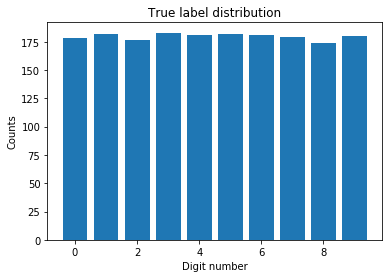

In [23]:
from collections import Counter
counts = Counter(digits.target)
counts = dict(counts)
plt.bar(counts.keys(),counts.values())
plt.xlabel('Digit number')
plt.ylabel('Counts')
plt.title('True label distribution')


counts = np.array(list(counts.values()))
probs = counts/np.sum(counts)
chance_level = np.mean(probs)
probs

Text(0, 0.5, 'Classification Accuracy')

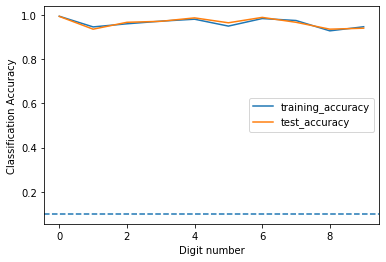

In [25]:
plt.plot(d["training_accuracy"],label="training_accuracy")
plt.plot(d["test_accuracy"],label="test_accuracy")
plt.axhline(y=chance_level,linestyle='--')
plt.legend()
plt.xlabel('Digit number')
plt.ylabel('Classification Accuracy')